In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from loader import *
from models import *
from utils import *
from plotting import *

In [3]:
# load_path_model = 'E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\Test simulations\\raw_output\\results\\jupyter_ver9copy\\models\\seq_len3_b1norm_noclip_3out_16-32-64-128.keras'
# model = keras.models.load_model(load_path_model, custom_objects={'softmax_categorical':softmax_categorical})

In [4]:
load_path_model = 'E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\New imulations\Raw_output\\models\\frame-by-frame.keras'
model = keras.models.load_model(load_path_model, custom_objects={'softmax_categorical':softmax_categorical})

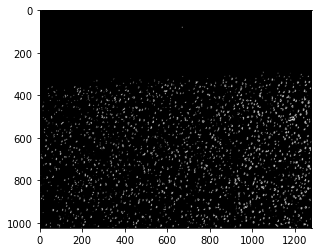

In [5]:
folder_path = 'E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\From erik\\darkfield higher mag'
im_stack = get_image_stack(
    outputs=[0], 
    folder_path=folder_path, 
    frame_im0=0, 
    im_size_width=1280, 
    im_size_height=1024,
    im_resize_width=1280, 
    im_resize_height=1024,
    function_img=[Normalize_image],
    function_diff=[Normalize_image])

# plot_image_stack(im_stack)
# plot_prediction(model=model, im_stack=im_stack)
plt.imshow(model.predict(im_stack)[0,:,:,1]>0.5, cmap='gray')

In [6]:
positions = extract_positions(
    no_of_frames=100, 
    outputs=[0],
    folder_path=folder_path, 
    frame_im0=0, 
    im_size_width=1280, 
    im_size_height=1024,
    im_resize_width=1280, 
    im_resize_height=1024,
    model=model, 
    layer=1, 
    value_threshold=0.5,
    function_img=[lambda im: -im, Normalize_image],
    function_diff=[Normalize_image])


In [7]:
list_of_plankton = assign_positions_to_planktons(positions, max_dist=10, threshold = 5, extrapolate=True)
list_of_plankton = Interpolate_gaps_in_plankton_positions(list_of_plankton=list_of_plankton)
list_of_plankton = Trim_list_from_stationary_planktons(list_of_plankton=list_of_plankton, min_distance=1)

plankton_track, plankton_dont_track = split_plankton(percentage_threshold=0.05, list_of_plankton=list_of_plankton)

Since the kernel freezes when trying to plot and save all images in one go we divide it up into parts and go at it 10 images at a time.

In [65]:
im_size_width=1280
im_size_height=1024
color_plankton_track = 'b'
save_path = 'E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\New imulations\\Oxhyris\\frame by frame'
frame_name = 'track'
file_type = '.jpg'
save_images = 1
frame_im0 = 60
no_of_frames = 10
pixel_length_ratio=1
x_axis_label='pixels'
y_axis_label='pixels'

positions_track = extract_positions_from_list(plankton_track)[frame_im0 - 5:frame_im0 + no_of_frames + 1,:]
list_paths = os.listdir(folder_path)

for i, j in enumerate(range(frame_im0, frame_im0 + no_of_frames)):
    fig, ax = plt.subplots(figsize=(10, 10), constrained_layout=True)
    im = cv2.imread(folder_path +'\\' + list_paths[j])
    dims = im.shape

    scale_height = dims[0]/im_size_height
    scale_width = dims[1]/im_size_width


    ax.plot(scale_width*positions_track[i:i+6, 1::2],scale_height*positions_track[i:i+6, 0::2], c=color_plankton_track,linewidth=1)
    ax.scatter(scale_width*positions_track[i+5,1::2], scale_height*positions_track[i+5,0::2], s=100, marker='.', facecolor='none', edgecolors=color_plankton_track)

    ax.imshow(im, cmap="gray")

    
    locs, labels = plt.xticks()
    labels = [int(float(item)*pixel_length_ratio) for item in locs]
    plt.xticks(locs[1:-1], labels[1:-1])
    plt.xlabel(x_axis_label)
    plt.xlabel(y_axis_label)
    plt.title('Planktons')
    
    if save_images: 
        plt.savefig(save_path + '\\' + frame_name + '%0{}d'.format(len(str(no_of_frames))) % j + file_type)
        plt.close(fig)
    else:
        
        plt.show()

In [ ]:
# plot_and_save_track(no_of_frames=100,
#                     plankton_track=plankton_track,
#                     plankton_dont_track=plankton_dont_track,
#                     folder_path=folder_path,
#                     frame_im0=60,
#                     save_images=1,
#                     show_plankton_track = True,
#                     show_plankton_dont_track = 0,
#                     show_numbers_track = 0,
#                     show_numbers_dont_track = 0,
#                     show_numbers_specific_plankton = False,
#                     show_specific_plankton = False,
#                     specific_plankton = None,
#                     color_plankton_track = 'b',
#                     color_plankton_dont_track = 'r',
#                     color_specific_plankton = 'w',
#                     save_path = 'E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\New imulations\\Oxhyris\\frame by frame',
#                     frame_name = 'track',
#                     file_type = '.jpg')

In [4]:
# Make_video(frame_im0=0,
#            folder_path='E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\New imulations\\Oxhyris\\frame by frame', 
#            save_path='E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\New imulations\\Oxhyris\\frame-by-frame.avi', 
#            fps=7, 
#            no_of_frames=55)

[  0.   0.   0.   0. 593. 558. 544. 720. 467. 375. 364. 318. 313. 283.
 266. 259. 249. 248. 226. 266. 192. 189. 195. 148. 128. 185. 154. 153.
 132. 113. 120. 113. 132. 131. 104.  85.  99.  92.  77.  87.  88.  63.
  73.  67.  65.  62.  60.  69.  65.  56.  55.  52.  37.  55.  53.  40.
  34.  28.  22.  38.  37.  25.  27.  28.  27.  32.  32.  31.  27.  18.
  20.  19.  22.  15.  12.  23.  19.  14.  22.  25.  16.  14.   7.  15.
  18.  10.  12.   7.   9.   8.  16.   7.   6.   9.  11.   5.  11.  13.
  14.  81.]
[0.0000e+00 0.0000e+00 1.9201e+04 1.1777e+04 8.4780e+03 6.3630e+03
 4.7410e+03 3.1160e+03 2.3000e+03 1.7850e+03 1.3130e+03 1.0720e+03
 7.7800e+02 5.6100e+02 5.1100e+02 2.7700e+02 2.2700e+02 3.1000e+02
 1.7100e+02 1.2400e+02 9.9000e+01 9.6000e+01 1.0100e+02 8.3000e+01
 6.9000e+01 5.3000e+01 5.2000e+01 4.4000e+01 3.1000e+01 5.8000e+01
 2.7000e+01 2.1000e+01 3.0000e+01 1.7000e+01 1.9000e+01 1.5000e+01
 1.9000e+01 1.2000e+01 1.0000e+01 7.0000e+00 1.4000e+01 7.0000e+00
 1.1000e+01 1.3000e+01

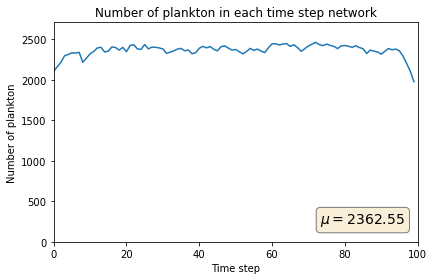

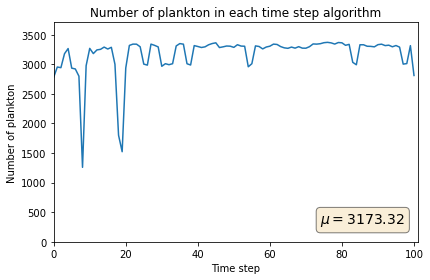

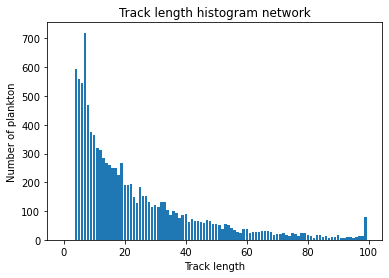

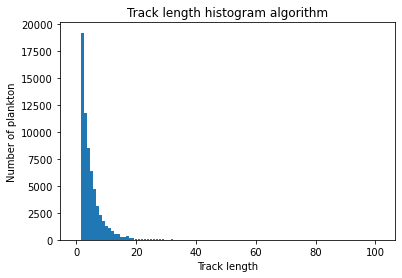

In [9]:
import xml.etree.ElementTree as ET

def plot_statistics(found_plankton_at_timestep, title):
    cropped_finds = found_plankton_at_timestep[np.nonzero(found_plankton_at_timestep)[0]]

    ax = plt.figure()
    plt.plot(range(len(cropped_finds)), cropped_finds)
    plt.xlabel('Time step')
    plt.ylabel('Number of plankton')
    plt.title(title)
    plt.tight_layout()
    mu = np.mean(cropped_finds)
    
    plt.axis([0, len(cropped_finds), 0, max(cropped_finds)*1.1])
    
    textstr = r'$\mu=%.2f$' % (mu, )
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.75, 0.25, textstr, fontsize=14,
            verticalalignment='top', bbox=props)
    
def get_found_plankton_at_timestep(plankton_track):
    no_timesteps = len(plankton_track[list(plankton_track.keys())[0]].positions)
    found_plankton_at_timestep = np.zeros(no_timesteps)

    for plankton in plankton_track:
        plankton = np.array(plankton_track[plankton].positions[:,0], dtype=float)
        where_list = np.where(np.isfinite(plankton))
        for i in where_list[0]:
            found_plankton_at_timestep[i] += 1
    return found_plankton_at_timestep

def get_found_plankton_from_xml(path, no_timesteps, var_str):
    tree = ET.parse(path)
    root = tree.getroot()


    found_plankton_at_timestep = np.zeros(no_timesteps)

    for particle in root.iter():
        my_dict = particle.attrib
        if var_str in my_dict:
            found_plankton_at_timestep[int(float(my_dict[var_str]))] += 1
    return found_plankton_at_timestep


def plot_bars(track_durations, title):
    plt.figure()
    plt.bar(range(len(track_durations)), track_durations)
    
    plt.xlabel('Track length')
    plt.ylabel('Number of plankton')
    plt.title(title)



def get_track_durations(plankton_track):
    no_of_timesteps = len(plankton_track[list(plankton_track.keys())[0]].positions)
    track_durations = np.zeros(no_of_timesteps)
    for plankton in plankton_track:
        plankton = np.array(plankton_track[plankton].positions[:,0], dtype=float)
        where_list = np.where(np.isfinite(plankton))
        track_start = np.min(where_list)
        track_end = np.max(where_list)

        track_durations[track_end-track_start] += 1
    return track_durations


found_plankton_at_timestep = get_found_plankton_at_timestep(plankton_track)     
plot_statistics(found_plankton_at_timestep, 'Number of plankton in each time step network')


path = "E:\\Documents\\Master\\exjobb\\software\\Tracking\\darkfield higher mag_Tracks.xml"
no_timesteps = 102
found_plankton_at_timestep = get_found_plankton_from_xml(path, no_timesteps, 't')
plot_statistics(found_plankton_at_timestep, 'Number of plankton in each time step algorithm')


track_durations = get_track_durations(plankton_track)
plot_bars(track_durations, 'Track length histogram network')
print(track_durations)

track_durations = get_found_plankton_from_xml(path, no_timesteps, 'nSpots')
plot_bars(track_durations, 'Track length histogram algorithm')
print(track_durations)